In [ ]:
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
!pip install catboost

     |████████████████████████████████| 64.8MB 65kB/s 


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# from fastai import *
# from fastai.tabular import * 
from catboost import CatBoostClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn import metrics

from numpy import loadtxt
from xgboost import XGBClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
%cd /content/drive/My\ Drive/Academics/semester7/machineLearning/project competition

/content/drive/My Drive/Academics/semester7/machineLearning/project competition


### Data preprocessing

In [ ]:
data = pd.read_csv('data/train.csv')

In [ ]:
data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
data.shape

(17176, 14)

In [ ]:
#Check duplicate rows
np.sum(data.duplicated())

4

In [ ]:
data = data.drop_duplicates()
np.sum(data.duplicated())

0

In [ ]:
data.isnull().sum()

tripid                         0
additional_fare              201
duration                     201
meter_waiting                201
meter_waiting_fare           201
meter_waiting_till_pickup    201
pickup_time                    0
drop_time                      0
pick_lat                       0
pick_lon                       0
drop_lat                       0
drop_lon                       0
fare                         137
label                          0
dtype: int64

In [ ]:
processed_data = data.dropna()

In [ ]:
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,1065.02,correct


In [ ]:
processed_data.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
label                        0
dtype: int64

In [ ]:
processed_data.shape

(16965, 14)

In [ ]:
from collections import Counter

counter = Counter(data['label'])
# estimate = counter[0] / counter[1]
# print('Estimate: %.3f' % estimate)
counter

Counter({'correct': 15495, 'incorrect': 1681})

In [ ]:
processed_data=data
#train1.fillna(train1.mean(), inplace=True)
processed_data['additional_fare'] = processed_data.groupby(['label'], sort=False)['additional_fare'].apply(lambda x: x.fillna(x.mean()))
processed_data['duration'] = processed_data.groupby(['label'], sort=False)['duration'].apply(lambda x: x.fillna(x.mean()))
processed_data['meter_waiting'] = processed_data.groupby(['label'], sort=False)['meter_waiting'].apply(lambda x: x.fillna(x.mean()))
processed_data['meter_waiting_fare'] = processed_data.groupby(['label'], sort=False)['meter_waiting_fare'].apply(lambda x: x.fillna(x.mean()))
processed_data['meter_waiting_till_pickup'] = processed_data.groupby(['label'], sort=False)['meter_waiting_till_pickup'].apply(lambda x: x.fillna(x.mean()))
processed_data['fare'] = processed_data.groupby(['label'], sort=False)['fare'].apply(lambda x: x.fillna(x.mean()))

In [ ]:
processed_data['label'].replace('correct', 1, inplace=True)
processed_data['label'].replace('incorrect', 0, inplace=True)

In [ ]:
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,1


In [ ]:
# Function to calculate distance from latitude and longitude

from math import radians, cos, sin, asin, sqrt 

def distance(lat1, lat2, lon1, lon2): 
      
    # The math module contains a function named 
    # radians which converts from degrees to radians. 
    lon1 = radians(lon1) 
    lon2 = radians(lon2) 
    lat1 = radians(lat1) 
    lat2 = radians(lat2) 
       
    # Haversine formula  
    dlon = lon2 - lon1  
    dlat = lat2 - lat1 
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
  
    c = 2 * asin(sqrt(a))  
     
    # Radius of earth in kilometers. Use 3956 for miles 
    r = 6371
       
    # calculate the result 
    return(c * r) 

In [ ]:
processed_data.insert(12, 'distance', np.vectorize(distance)(processed_data['pick_lat'], processed_data['drop_lat'], processed_data['pick_lon'], processed_data['drop_lon']))

In [ ]:
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


### Splitting data and handling data imbalance

In [ ]:
df_columns = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup','day', 'is_weekday','distance', 'fare', 'label']
# df_columns = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup','pick_lat',	'pick_lon',	'drop_lat',	'drop_lon', 'distance', 'fare', 'label']
train = processed_data.filter(df_columns, axis=1)

In [ ]:
x = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [ ]:
print(x.shape)
print(y.shape)

(16965, 9)
(16965,)


In [ ]:
#Splitting data into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) #random_state = 42 is included just to split in same ways

In [ ]:
# Handling data imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=0.6)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
processed_data.dtypes

tripid                         int64
additional_fare              float64
duration                     float64
meter_waiting                float64
meter_waiting_fare           float64
meter_waiting_till_pickup    float64
pickup_time                   object
drop_time                     object
pick_lat                     float64
pick_lon                     float64
drop_lat                     float64
drop_lon                     float64
fare                         float64
label                          int64
dtype: object

In [ ]:
processed_data['pickup_time'] = pd.to_datetime(processed_data.pickup_time)
processed_data['drop_time'] = pd.to_datetime(processed_data.drop_time)
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,2019-11-01 03:34:00,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


In [ ]:
processed_data.dtypes

tripid                                int64
additional_fare                     float64
duration                            float64
meter_waiting                       float64
meter_waiting_fare                  float64
meter_waiting_till_pickup           float64
pickup_time                  datetime64[ns]
drop_time                    datetime64[ns]
pick_lat                            float64
pick_lon                            float64
drop_lat                            float64
drop_lon                            float64
distance                            float64
fare                                float64
label                                 int64
dtype: object

### Feature Engineering

In [ ]:
import featuretools as ft
es = ft.EntitySet('fare_data')

es.entity_from_dataframe(dataframe=processed_data,
                         entity_id='log',
                         index='tripid')

fm, features = ft.dfs(entityset=es, 
                      target_entity='log',
                      trans_primitives=['day', 'weekday', 'month'])

In [ ]:
processed_data.insert(6, 'day', processed_data.pickup_time.dt.dayofweek)

In [ ]:
processed_data.drop('is_weekday', axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
processed_data['categorical'] = pd.Categorical(processed_data['categorical'])

In [ ]:
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,day,is_weekday,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,4,1,2019-11-01 00:20:00,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,4,1,2019-11-01 00:56:00,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,4,1,2019-11-01 01:08:00,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,4,1,2019-11-01 02:27:00,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
5,189129552,10.5,3407.0,182.0,0.0000,112.0,4,1,2019-11-01 05:38:00,2019-11-01 06:35:00,7.13402,79.8969,6.91865,79.8649,24.207039,1065.02,1


In [ ]:
# Third position would be at index 2, because of zero-indexing.
processed_data.insert(7, 'pickup_day', processed_data.pickup_time.dt.weekday)
processed_data.insert(8, 'pickup_month', processed_data.pickup_time.dt.month)
processed_data.insert(9, 'pickup_year', processed_data.pickup_time.dt.year)
processed_data.insert(10, 'pickup_hour', processed_data.pickup_time.dt.hour)
processed_data.insert(11, 'pickup_minute', processed_data.pickup_time.dt.minute)
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,4,11,2019,0,20,2019-11-01 00:34:00,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,4,11,2019,0,56,2019-11-01 01:09:00,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,4,11,2019,1,8,2019-11-01 01:26:00,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,4,11,2019,2,27,2019-11-01 02:37:00,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,2019-11-01 03:34:00,4,11,2019,3,34,2019-11-01 03:51:00,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


In [ ]:
processed_data.insert(13, 'drop_day', processed_data.drop_time.dt.weekday)
processed_data.insert(14, 'drop_month', processed_data.drop_time.dt.month)
processed_data.insert(15, 'drop_year', processed_data.drop_time.dt.year)
processed_data.insert(16, 'drop_hour', processed_data.drop_time.dt.hour)
processed_data.insert(17, 'drop_minute', processed_data.drop_time.dt.minute)
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,2019-11-01 00:20:00,4,11,2019,0,20,2019-11-01 00:34:00,4,11,2019,0,34,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,2019-11-01 00:56:00,4,11,2019,0,56,2019-11-01 01:09:00,4,11,2019,1,9,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,2019-11-01 01:08:00,4,11,2019,1,8,2019-11-01 01:26:00,4,11,2019,1,26,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,2019-11-01 02:27:00,4,11,2019,2,27,2019-11-01 02:37:00,4,11,2019,2,37,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,2019-11-01 03:34:00,4,11,2019,3,34,2019-11-01 03:51:00,4,11,2019,3,51,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


In [ ]:
processed_data.insert(6, 'is_weekday', processed_data.pickup_day.apply(lambda x: 0 if x > 4 else 1))
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,is_weekday,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,1,2019-11-01 00:20:00,4,11,2019,0,20,2019-11-01 00:34:00,4,11,2019,0,34,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,1,2019-11-01 00:56:00,4,11,2019,0,56,2019-11-01 01:09:00,4,11,2019,1,9,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,1,2019-11-01 01:08:00,4,11,2019,1,8,2019-11-01 01:26:00,4,11,2019,1,26,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,1,2019-11-01 02:27:00,4,11,2019,2,27,2019-11-01 02:37:00,4,11,2019,2,37,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,1,2019-11-01 03:34:00,4,11,2019,3,34,2019-11-01 03:51:00,4,11,2019,3,51,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


In [ ]:
processed_data.insert(6, 'distance_duration', (processed_data['duration'] - processed_data['meter_waiting']- processed_data['meter_waiting_till_pickup']))
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,distance_duration,is_weekday,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare,label
0,189123628,10.50000,834.000000,56.000000,0.000000,64.000000,714.000000,1,2019-11-01 00:20:00,4,11,2019,0,20,2019-11-01 00:34:00,4,11,2019,0,34,6.86252,79.8993,6.90330,79.8783,5.092770,270.32,1
1,189125358,10.50000,791.000000,47.000000,0.000000,134.000000,610.000000,1,2019-11-01 00:56:00,4,11,2019,0,56,2019-11-01 01:09:00,4,11,2019,1,9,6.88589,79.8984,6.91373,79.8923,3.168058,197.85,1
2,189125719,10.50000,1087.000000,80.000000,0.000000,61.000000,946.000000,1,2019-11-01 01:08:00,4,11,2019,1,8,2019-11-01 01:26:00,4,11,2019,1,26,6.90839,79.8651,6.93669,79.9146,6.305395,301.64,1
3,189127273,10.50000,598.000000,271.000000,15.663800,68.000000,259.000000,1,2019-11-01 02:27:00,4,11,2019,2,27,2019-11-01 02:37:00,4,11,2019,2,37,6.92570,79.8895,6.92748,79.8971,0.861946,82.30,1
4,189128020,12.44434,1413.967232,356.655679,16.909938,107.549152,949.762401,1,2019-11-01 03:34:00,4,11,2019,3,34,2019-11-01 03:51:00,4,11,2019,3,51,6.87441,79.8615,6.84478,79.9290,8.147782,358.39,1


In [ ]:
processed_data.to_csv('data/new_train_data.csv', index=False)

In [ ]:
processed_data.columns.values

array(['tripid', 'additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup',
       'pickup_time', 'drop_time', 'pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare', 'label'], dtype=object)

### Data Analysis

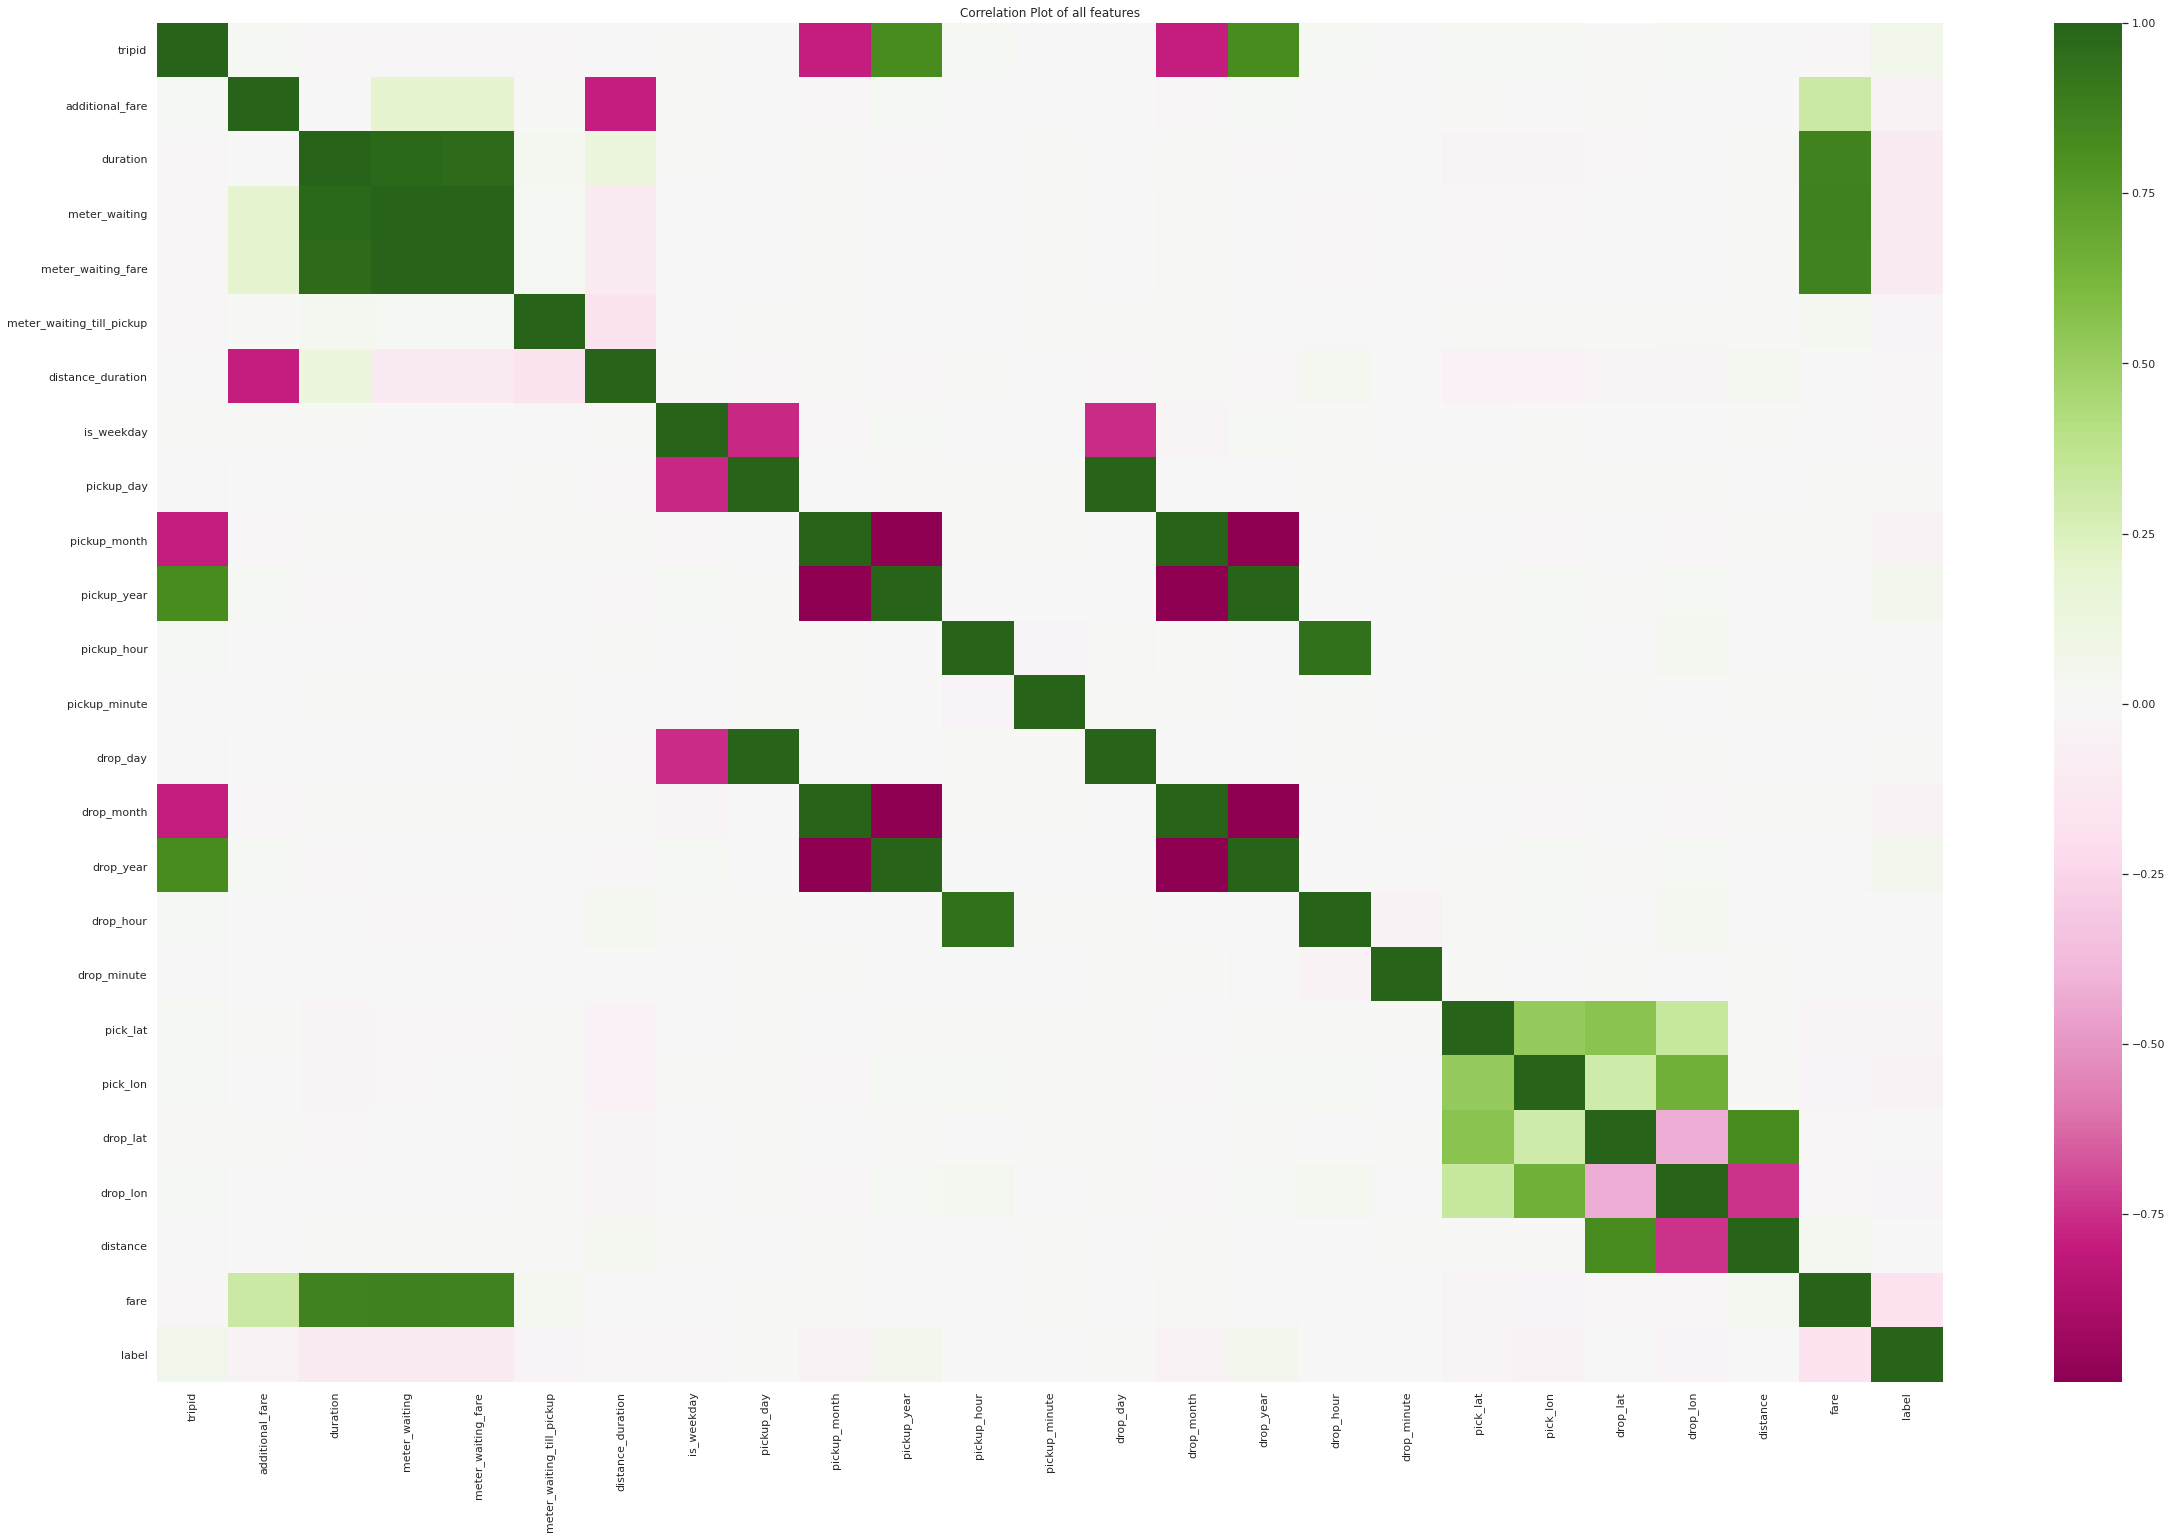

In [ ]:
data_corr = processed_data.corr()
sns.set() 
plt.figure(figsize=(40, 25))
plt.title('Correlation Plot of all features')
ax = sns.heatmap(data_corr,cmap="PiYG")

In [ ]:
df_cols = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'distance_duration', 'pickup_day', 'pickup_month', 'pickup_year', 'pickup_hour', 'pickup_minute','pick_lat', 'pick_lon', 'drop_hour', 'drop_minute', 'drop_lat', 'drop_lon','distance', 'fare','label' ]
# df_cols = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_day', 'pickup_month', 'pickup_year', 'pickup_hour', 'pickup_minute','pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare','label' ]
# df_cols = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'pickup_day',  'pickup_hour', 'pickup_minute','pick_lat', 'pick_lon', 'drop_lat', 'drop_lon', 'fare','label' ]
df = processed_data.filter(df_cols, axis=1)
df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,distance_duration,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,pick_lat,pick_lon,drop_hour,drop_minute,drop_lat,drop_lon,distance,fare,label
0,10.5,834.0,56.0,0.0000,64.0,714.0,4,11,2019,0,20,6.86252,79.8993,0,34,6.90330,79.8783,5.092770,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,610.0,4,11,2019,0,56,6.88589,79.8984,1,9,6.91373,79.8923,3.168058,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,946.0,4,11,2019,1,8,6.90839,79.8651,1,26,6.93669,79.9146,6.305395,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,259.0,4,11,2019,2,27,6.92570,79.8895,2,37,6.92748,79.8971,0.861946,82.30,1
5,10.5,3407.0,182.0,0.0000,112.0,3113.0,4,11,2019,5,38,7.13402,79.8969,6,35,6.91865,79.8649,24.207039,1065.02,1


In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
# x = processed_data.iloc[:, :-1].values
# y = processed_data.iloc[:, -1].values

In [ ]:
# do not execute this cell
#Assigning independent and dependent variable

x = processed_data.iloc[:, np.r_[1:6, 8:13]].values #columns with index 2 and 3
# x = processed_data.iloc[:, np.r_[1:6, 12]]
y = processed_data.iloc[:, -1].values

In [ ]:
x.shape

(16965, 19)

In [ ]:
df_x = pd.DataFrame.from_records(x)
df_x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,10.5,834.0,56.0,0.0000,64.0,4.0,11.0,2019.0,0.0,20.0,6.86252,79.8993,6.90330,79.8783,270.32
1,10.5,791.0,47.0,0.0000,134.0,4.0,11.0,2019.0,0.0,56.0,6.88589,79.8984,6.91373,79.8923,197.85
2,10.5,1087.0,80.0,0.0000,61.0,4.0,11.0,2019.0,1.0,8.0,6.90839,79.8651,6.93669,79.9146,301.64
3,10.5,598.0,271.0,15.6638,68.0,4.0,11.0,2019.0,2.0,27.0,6.92570,79.8895,6.92748,79.8971,82.30
4,10.5,3407.0,182.0,0.0000,112.0,4.0,11.0,2019.0,5.0,38.0,7.13402,79.8969,6.91865,79.8649,1065.02


In [ ]:
y

array([1, 1, 1, 1, ..., 1, 1, 1, 1])

In [ ]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state =42)

In [ ]:
train_data.to_csv('data/train_data.csv', index=False)
test_data.to_csv('data/test_data.csv', index=False)

In [ ]:
train = pd.read_csv('data/train_data.csv')
test = pd.read_csv('data/test_data.csv')

In [ ]:
#Splitting data into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) #random_state = 42 is included just to split in same ways

In [ ]:
eval_set = [(x_train, y_train), (x_test, y_test)]
eval_metric = ["auc","error"]

model = XGBClassifier(learning_rate=0.01,
                      n_estimators=1000,
                      max_depth=3,
                      subsample=0.8,
                      colsample_bytree=1,
                      gamma=1)
%time model.fit(x_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

In [ ]:
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", accuracy_score(y_pred, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9461143386377031
Testing Accuracy : 0.9377332547633078
              precision    recall  f1-score   support

           0       0.82      0.41      0.55       466
           1       0.94      0.99      0.97      4625

    accuracy                           0.94      5091
   macro avg       0.88      0.70      0.76      5091
weighted avg       0.93      0.94      0.93      5091



In [ ]:
# Handling data imbalance
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=27, ratio=0.6)
x_train, y_train = sm.fit_sample(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
print(x_train.shape)
print(y_train)
print(np.count_nonzero(y_train==0))
print(np.count_nonzero(y_train!=0))

(18388, 15)
[1 1 0 1 ... 0 0 0 0]
7571
10817


In [ ]:
#Feature scaling
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

## Modelling Classifiers

### Regression

In [ ]:
reg_data = train[train.label.eq(1)]
reg_data.shape

(15442, 8)

In [ ]:
reg_data = reg_data.drop('label', 1)
reg_data.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,distance,fare
0,10.5,834.0,56.0,0.0000,64.0,5.092770,270.32
1,10.5,791.0,47.0,0.0000,134.0,3.168058,197.85
2,10.5,1087.0,80.0,0.0000,61.0,6.305395,301.64
3,10.5,598.0,271.0,15.6638,68.0,0.861946,82.30
5,10.5,3407.0,182.0,0.0000,112.0,24.207039,1065.02


In [ ]:
reg_x = reg_data.iloc[:, :-1].values
reg_y = reg_data.iloc[:, -1].values
print(reg_x.shape)
print(reg_y.shape)

(15442, 6)
(15442,)


In [ ]:
#Splitting data into test set and train set
from sklearn.model_selection import train_test_split
reg_x_train, reg_x_test, reg_y_train, reg_y_test = train_test_split(reg_x, reg_y, test_size = 0.3, random_state=42) #random_state = 42 is included just to split in same ways

#### Random forest

In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(reg_x_train, reg_y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [ ]:
print(reg_y_pred.shape)
print(reg_y_test.shape)

(4633,)
(4633,)


In [ ]:
from sklearn.metrics import mean_squared_error

reg_y_pred = rf.predict(reg_x_test)

rmse = np.sqrt(mean_squared_error(reg_y_test, reg_y_pred))
print("RMSE: %f" % (rmse))

RMSE: 115.254329


In [ ]:
rf.get_params

<bound method BaseEstimator.get_params of RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=1000, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

random_grid

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(reg_x_train, reg_y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 11.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 48.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 89.9min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 600}

In [ ]:
best_random = rf_random.best_estimator_
reg_y_pred = best_random.predict(reg_x_test)

rmse = np.sqrt(mean_squared_error(reg_y_test, reg_y_pred))
print("RMSE: %f" % (rmse))

RMSE: 114.820081


In [ ]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy


base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(reg_x_train, reg_y_train)
base_accuracy = evaluate(base_model, reg_x_test, reg_y_test)
# Model Performance
# Average Error: 3.9199 degrees.
# Accuracy = 93.36%.
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, reg_x_test, reg_y_test)
# Model Performance
# Average Error: 3.7152 degrees.
# Accuracy = 93.73%.
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))
# Improvement of 0.40%.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


Model Performance
Average Error: 39.8552 degrees.
Accuracy = -inf%.
Model Performance
Average Error: 37.6759 degrees.
Accuracy = -inf%.
Improvement of nan%.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in double_scalars


#### Ignore

In [ ]:
y_pred

array([0.97 , 0.994, 0.98 , ..., 0.967, 0.998, 0.989])

In [ ]:
y_pred.shape

(5090,)

In [ ]:
y_pred[y_pred >= 0.5] = 1

In [ ]:
y_pred = y_pred.astype(int)
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.85      0.54      0.66       460
           1       0.96      0.99      0.97      4630

    accuracy                           0.95      5090
   macro avg       0.90      0.77      0.82      5090
weighted avg       0.95      0.95      0.94      5090



In [ ]:
pred_label = rf.predict(x)

In [ ]:
pred_label

array([0.995, 0.999, 0.999, ..., 0.999, 1.   , 1.   ])

In [ ]:
processed_data.insert(13, 'pred_label', pred_label)

In [ ]:
processed_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,pred_label,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,5.092770,0.995,270.32,1
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,3.168058,0.999,197.85,1
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,6.305395,0.999,301.64,1
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,0.861946,0.999,82.30,1
5,189129552,10.5,3407.0,182.0,0.0000,112.0,11/1/2019 5:38,11/1/2019 6:35,7.13402,79.8969,6.91865,79.8649,24.207039,1.000,1065.02,1


In [ ]:
# processed_data.loc[processed_data['pred_label'] > 1990, 'First Season'] = 1

#### Catboost

In [ ]:
from catboost import CatBoostRegressor

# Instantiate model with 1000 decision trees
cb = CatBoostRegressor(depth= 10, iterations= 1000, l2_leaf_reg=1, learning_rate= 0.001, random_state = 42)
# Train the model on training data
cb.fit(reg_x_train, reg_y_train)

0:	learn: 359.9964169	total: 19.3ms	remaining: 19.3s
1:	learn: 359.7739814	total: 37.4ms	remaining: 18.7s
2:	learn: 359.5539577	total: 56ms	remaining: 18.6s
3:	learn: 359.3275667	total: 72.6ms	remaining: 18.1s
4:	learn: 359.1046349	total: 89.4ms	remaining: 17.8s
5:	learn: 358.8787993	total: 107ms	remaining: 17.7s
6:	learn: 358.6640453	total: 125ms	remaining: 17.7s
7:	learn: 358.4477152	total: 142ms	remaining: 17.6s
8:	learn: 358.2270451	total: 160ms	remaining: 17.6s
9:	learn: 358.0050845	total: 178ms	remaining: 17.6s
10:	learn: 357.7829616	total: 195ms	remaining: 17.5s
11:	learn: 357.5625763	total: 217ms	remaining: 17.8s
12:	learn: 357.3431680	total: 235ms	remaining: 17.8s
13:	learn: 357.1285705	total: 253ms	remaining: 17.8s
14:	learn: 356.9043245	total: 270ms	remaining: 17.7s
15:	learn: 356.6869414	total: 287ms	remaining: 17.7s
16:	learn: 356.4631880	total: 303ms	remaining: 17.5s
17:	learn: 356.2427342	total: 321ms	remaining: 17.5s
18:	learn: 356.0289406	total: 338ms	remaining: 17.4s


In [ ]:
cb_reg_y_pred = cb.predict(reg_x_test)

rmse = np.sqrt(mean_squared_error(reg_y_test, cb_reg_y_pred))
print("RMSE: %f" % (rmse))

RMSE: 191.194959


In [ ]:
from numpy import mean, median
median(reg_y_train)

205.04

#### classification

In [ ]:
df_columns = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'distance', 'fare', 'pred_label','label']
# df_columns = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup','pick_lat',	'pick_lon',	'drop_lat',	'drop_lon', 'distance', 'fare', 'label']
train = processed_data.filter(df_columns, axis=1)
x = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [ ]:
#Splitting data into test set and train set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42) #random_state = 42 is included just to split in same ways

### Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training Accuracy : 0.9167298139260756
Testing Accuracy : 0.9147515222942447
              precision    recall  f1-score   support

           0       0.69      0.13      0.21       466
           1       0.92      0.99      0.95      4625

    accuracy                           0.91      5091
   macro avg       0.80      0.56      0.58      5091
weighted avg       0.90      0.91      0.89      5091



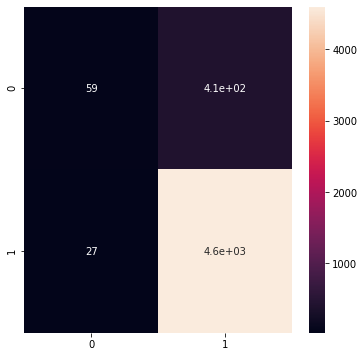

In [ ]:
# MODELLING

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = LogisticRegression(random_state=0,max_iter=50,penalty='l2')
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

### DecisionTree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth = 5)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# precision recall and f1 score
print ('Precision Score : '+ str(precision_score(y_test, y_pred)))
print ('Recall Score    : '+ str(recall_score(y_test, y_pred)))
print ('F1 Score        : '+ str(f1_score(y_test, y_pred)))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# # classification report
# cr = classification_report(y_test, y_pred)
# print(cr)

Training Accuracy : 0.9390418455839017
Testing Accuracy : 0.9320369279120015
Precision Score : 0.9399547604359448
Recall Score    : 0.9883243243243244
F1 Score        : 0.9635328836424957


In [ ]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.76      0.37      0.50       466
           1       0.94      0.99      0.96      4625

    accuracy                           0.93      5091
   macro avg       0.85      0.68      0.73      5091
weighted avg       0.92      0.93      0.92      5091



### SVC

In [ ]:
from sklearn.svm import SVC
model = SVC(gamma=0.1,kernel='linear',C=0.1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (6, 6)
sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

### AdaBoost

In [ ]:
# MODELLING

from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = AdaBoostClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.91706659930959
Testing Accuracy : 0.9133765468473777
              precision    recall  f1-score   support

           0       0.58      0.20      0.30       466
           1       0.92      0.98      0.95      4625

    accuracy                           0.91      5091
   macro avg       0.75      0.59      0.63      5091
weighted avg       0.89      0.91      0.89      5091



### XGBoost

In [ ]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# fit model no training data
xgb_model = XGBClassifier(booster= 'dart',
                      colsample_bytree= 0.8,
                      gamma= 0.2,
                      max_depth= 7,
                      min_child_weight= 3,
                      reg_alpha= 0.1,
                      subsample= 0.6)

xgb_model.fit(x_train, y_train)

y_pred = xgb_model.predict(x_test)

# evaluating the model
print("Training Accuracy :", xgb_model.score(x_train, y_train))
print("Testing Accuracy :", accuracy_score(y_pred, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9698577081754652
Testing Accuracy : 0.9457866823806718
              precision    recall  f1-score   support

           0       0.81      0.51      0.63       457
           1       0.95      0.99      0.97      4634

    accuracy                           0.95      5091
   macro avg       0.88      0.75      0.80      5091
weighted avg       0.94      0.95      0.94      5091



In [ ]:
# classification report
cr = classification_report(y_test, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.84      0.41      0.55       466
           1       0.94      0.99      0.97      4625

    accuracy                           0.94      5091
   macro avg       0.89      0.70      0.76      5091
weighted avg       0.93      0.94      0.93      5091



In [ ]:
from numpy import mean
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

model = XGBClassifier()
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.89851


In [ ]:
from collections import Counter

counter = Counter(y)
counter[1]/counter[0]

10.119266055045872

In [ ]:
model = XGBClassifier(scale_pos_weight=0.05)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, x, y, scoring='roc_auc', cv=cv, n_jobs=-1)
# summarize performance
print('Mean ROC AUC: %.5f' % mean(scores))

Mean ROC AUC: 0.89550


#### Parameter tuning of XGBoost

In [ ]:
def update(base_dict, update_copy):
    for key in update_copy.keys():
        base_dict[key] = update_copy[key]

def step1_find_depth_and_child(params):
    test1 = {
        'max_depth': list(range(3,12,2)),
        'min_child_weight': list(range(1,10,2))
    }

    return grid_search(params, test1, 1)

def step2_narrow_depth(params):
    max_depth = params['max_depth']
    test2 = {
        'max_depth': [max_depth-1,max_depth,max_depth+1]
    }
    return grid_search(params, test2, 2)

def step3_gamma(params):
    test3 = {
        'gamma': list([i/10.0 for i in range(0,5)])
    }
    return grid_search(params, test3, 3)

def step4_sample(params):
    test4 = {
        'subsample':list([i/10.0 for i in range(6,10)]),
        'colsample_bytree':list([i/10.0 for i in range(6,10)])
    }
    return grid_search(params, test4, 4)

def step5_reg1(params):
    test5 = {
        'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
    }
    return grid_search(params, test5, 5)

In [ ]:
FOLDS = 5
EARLY_STOP = 50
MAX_ROUNDS = 5

PARAMS1 = {
'objective': 'reg:linear',
    'eval_metric': 'rmse',
'silent' : 1,
    'learning_rate':0.0045,'seed':4242
}

print("loading")
start_time = time.time()
train._run_startup()
params = dict(PARAMS1)

In [ ]:
# Step 1
step1_result = step1_find_depth_and_child(params)
#step1_result = {'max_depth': 3, 'min_child_weight': 7}
update(params,step1_result)
print("Step 1 Result: {}".format(step1_result))

In [ ]:
# Step 2
step2_result = step2_narrow_depth(params)
#step2_result = {'max_depth': 4}
update(params, step2_result)
print("Step 2 Result: {}".format(step2_result))

In [ ]:
# Step 3
step3_result = step3_gamma(params)
#step3_result = {'gamma': 0.4}
update(params, step3_result)
print("Step 3 Result: {}".format(step3_result))

In [ ]:
# Step 4
step4_result = step4_sample(params)
#step4_result = {'colsample_bytree': 0.9, 'subsample': 0.8}
update(params, step4_result)
print("Step 4 Result: {}".format(step4_result))

In [ ]:
# Step 5
step5_result = step5_reg1(params)
#step5_result = {'colsample_bytree': 0.9, 'subsample': 0.8}
update(params, step5_result)
print("Step 5 Result: {}".format(step5_result))

In [ ]:
print("Final Result: {}".format(params))
elapsed_time = time.time() - start_time
print("Elapsed time: {}".format(hms_string(elapsed_time)))

In [ ]:
model_params = {
    'xg_boost': {
        'model': XGBClassifier(objective= 'reg:linear',
                                eval_metric= 'rmse',
                                silent = 1,
                                seed= 4242),
        'params': {
            'learning_rate': [0.05, 0.1,0.16],
            'n_estimators': [200],
            'booster': ['gbtree', 'gblinear', 'dart'],
            'max_depth': list(range(3,12,2)),
            'min_child_weight': list(range(1,10,2)),
            'gamma': list([i/10.0 for i in range(0,5)]),
            'subsample':list([i/10.0 for i in range(6,10)]),
            'colsample_bytree':list([i/10.0 for i in range(6,10)]),
            'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
        }
    }
}

In [ ]:
model_params = {
    'xg_boost': {
        'model': XGBClassifier(objective= 'reg:linear',
                                eval_metric= 'rmse',
                                silent = 1,
                                seed= 4242),
        'params': {
            'learning_rate': [0.05, 0.1,0.16],
            'n_estimators': [200],
            'booster': ['gbtree', 'gblinear', 'dart'],
            'max_depth': [3,7],
            'min_child_weight': [3,7],
            'gamma': [0.2,0.4],
            'subsample':[0.6,0.8],
            'colsample_bytree':[0.6,0.8],
            'reg_alpha':[1e-2, 0.1, 1]
        }
    }
}

In [ ]:
from sklearn.model_selection import GridSearchCV

scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    print('Training started')
    clf.fit(x_train, y_train)
    print('predicting')
    y_pred = clf.predict(x_test)

    # evaluating the model
    print("Training Accuracy :", clf.score(x_train, y_train))
    print("Testing Accuracy :", accuracy_score(y_pred, y_test))

    # # confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # plt.rcParams['figure.figsize'] = (6, 6)
    # sns.heatmap(cm ,annot = True)

    # classification report
    cr = classification_report(y_test, y_pred)
    print(cr)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

Training started


In [ ]:
pd.DataFrame(clf.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_booster,param_colsample_bytree,param_gamma,param_max_depth,param_min_child_weight,param_reg_alpha,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.534859,0.008573,0.006605,0.000318,gbtree,0.6,0.2,3,3,0.01,0.6,"{'booster': 'gbtree', 'colsample_bytree': 0.6,...",0.917508,0.913721,0.914105,0.912842,0.915368,0.914709,0.001619,164
1,0.494846,0.002220,0.006753,0.000323,gbtree,0.6,0.2,3,3,0.01,0.8,"{'booster': 'gbtree', 'colsample_bytree': 0.6,...",0.917508,0.912458,0.914105,0.912842,0.916211,0.914625,0.001948,170
2,0.539811,0.005662,0.006834,0.000327,gbtree,0.6,0.2,3,3,0.1,0.6,"{'booster': 'gbtree', 'colsample_bytree': 0.6,...",0.917088,0.913721,0.914105,0.912421,0.915368,0.914541,0.001583,182
3,0.501314,0.004015,0.006747,0.000288,gbtree,0.6,0.2,3,3,0.1,0.8,"{'booster': 'gbtree', 'colsample_bytree': 0.6,...",0.917508,0.912458,0.914105,0.912842,0.916211,0.914625,0.001948,170
4,0.533803,0.003010,0.006633,0.000384,gbtree,0.6,0.2,3,3,1,0.6,"{'booster': 'gbtree', 'colsample_bytree': 0.6,...",0.917508,0.912879,0.913684,0.912000,0.915368,0.914288,0.001956,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,3.738584,0.108968,0.014505,0.000488,dart,0.8,0.4,7,7,0.01,0.8,"{'booster': 'dart', 'colsample_bytree': 0.8, '...",0.941077,0.936869,0.942316,0.933053,0.933895,0.937442,0.003719,16
284,3.621651,0.100378,0.013994,0.000494,dart,0.8,0.4,7,7,0.1,0.6,"{'booster': 'dart', 'colsample_bytree': 0.8, '...",0.941077,0.936448,0.942737,0.932632,0.934316,0.937442,0.003877,15
285,3.640189,0.072668,0.014137,0.000366,dart,0.8,0.4,7,7,0.1,0.8,"{'booster': 'dart', 'colsample_bytree': 0.8, '...",0.941077,0.936869,0.942316,0.932632,0.933474,0.937273,0.003900,22
286,3.197913,0.081946,0.012611,0.000782,dart,0.8,0.4,7,7,1,0.6,"{'booster': 'dart', 'colsample_bytree': 0.8, '...",0.941919,0.935185,0.942316,0.930105,0.932211,0.936347,0.004982,40


In [ ]:
clf.best_params_

{'booster': 'dart',
 'colsample_bytree': 0.8,
 'gamma': 0.2,
 'max_depth': 7,
 'min_child_weight': 3,
 'reg_alpha': 0.1,
 'subsample': 0.6}

### Random Forest

In [ ]:
def balance_data(data_x = x_train, data_y = y_train):
  sm = SMOTE(random_state=27, ratio=1.0)
  data_x, data_y = sm.fit_sample(data_x, data_y)

  return data_x, data_y

In [ ]:
def random_forest_classifier(data_to_classify):
  # x_train, y_train = balance_data(data_x = x, data_y = y)
  model = RandomForestClassifier(n_estimators=2000,max_features=6,max_depth=10,min_samples_leaf=1)
  model.fit(x_train, y_train)

  y_pred = model.predict(data_to_classify)

  return y_pred

#### Parameter tuning

In [ ]:
# calculate the time to run a GridSearchCV for multiple numbers of parameter permutations.  
grid_times = {}
clf = RandomForestClassifier(random_state = 42)

# features = X_train.columns.drop(['Name', 'PassengerId'], 1)

# I commented this out after running once locally since this block of code takes a long time to run
'''
for number in np.arange(2, 600, 50):
    
    param = np.arange(1,number,10)
    param_grid = {"n_estimators": param,
                  "criterion": ["gini", "entropy"]}
    
    grid_search = GridSearchCV(clf, param_grid = param_grid)
    
    t0 = time()
    grid_search.fit(X_train[features], y_train)
    compute_time = time() - t0
    grid_times[len(grid_search.grid_scores_)] = time() - t0
    
grid_times = pd.DataFrame.from_dict(grid_times, orient = 'index')
'''

# hard-coded values were found by running code above
grid_times = {0: { 2: 0.034411907196044922,
                  12: 1.5366179943084717,
                  22: 5.0431020259857178,
                  32: 11.378448963165283,
                  42: 20.211128950119019,
                  52: 30.040457010269165,
                  62: 39.442277908325195,
                  72: 56.834053993225098,
                  82: 67.847633838653564,
                  92: 91.005517959594727,
                  102: 111.2420859336853,
                  112: 135.75759792327881}}

In [ ]:
# function takes a RF parameter and a ranger and produces a plot and dataframe of CV scores for parameter values
def evaluate_param(parameter, num_range, index):
    grid_search = GridSearchCV(clf, param_grid = {parameter: num_range})
    grid_search.fit(x_train, y_train)
    
    df = {}
    for i, score in enumerate(grid_search.cv_results_):
        df[score[0][parameter]] = score[1]
       
    
    df = pd.DataFrame.from_dict(df, orient='index')
    df.reset_index(level=0, inplace=True)
    df = df.sort_values(by='index')
 
    plt.subplot(3,2,index)
    plot = plt.plot(df['index'], df[0])
    plt.title(parameter)
    return plot, df

In [ ]:
# parameters and ranges to plot
param_grid = {"n_estimators": np.arange(2, 300, 2),
              "max_depth": np.arange(1, 28, 1),
              "min_samples_split": np.arange(1,150,1),
              "min_samples_leaf": np.arange(1,60,1),
              "max_leaf_nodes": np.arange(2,60,1),
              "min_weight_fraction_leaf": np.arange(0.1,0.4, 0.1)}

In [ ]:
index = 1
plt.figure(figsize=(16,12))
for parameter, param_range in dict.items(param_grid):   
    evaluate_param(parameter, param_range, index)
    index += 1

TypeError: ignored

<Figure size 1152x864 with 0 Axes>

#### Balanced Random forest

In [ ]:
# Modelling balanced random forest

params = {
    "n_estimators": 200,
    "max_depth": 15,
    "min_samples_split": 100,
    "min_samples_leaf":40,
    "max_leaf_nodes": 30,
    "min_weight_fraction_leaf": 0.2
}
brf_model = BalancedRandomForestClassifier(max_depth=2, random_state=42)
brf_model.fit(x_train, y_train)

y_pred = brf_model.predict(x_test)

# evaluating the model
print("Training Accuracy :", brf_model.score(x_train, y_train))
print("Testing Accuracy :", brf_model.score(x_test, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

In [ ]:
# MODELLING

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators=2000,max_features=6,max_depth=10,min_samples_leaf=1)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 0.9277414879472802
Testing Accuracy : 0.9381139489194499
              precision    recall  f1-score   support

           0       0.67      0.62      0.64       460
           1       0.96      0.97      0.97      4630

    accuracy                           0.94      5090
   macro avg       0.82      0.80      0.81      5090
weighted avg       0.94      0.94      0.94      5090



## Cat Boost


In [ ]:
import catboost as cb
cat_features_index = [0,1,2,3,4,5,6]

def auc(m, x_train, x_test): 
    return (metrics.roc_auc_score(y_train,m.predict_proba(x_train)[:,1]),
                            metrics.roc_auc_score(y_test,m.predict_proba(x_test)[:,1]))

params = {'depth': [4, 7, 10],
          'learning_rate' : [0.03, 0.1, 0.15],
         'l2_leaf_reg': [1,4,9],
         'iterations': [1000]}
cb = cb.CatBoostClassifier()
cb_model = GridSearchCV(cb, params, scoring="roc_auc", cv = 3)
cb_model.fit(x_train, y_train)

# With Categorical features
clf = CatBoostClassifier(eval_metric="AUC", depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(x_train,y_train)
auc(clf, x_train, x_test)

# With Categorical features
clf = CatBoostClassifier(eval_metric="AUC",one_hot_max_size=31, \
                            depth=10, iterations= 500, l2_leaf_reg= 9, learning_rate= 0.15)
clf.fit(x_train,y_train, cat_features= cat_features_index)
auc(clf, x_train, x_test)

Streaming output truncated to the last 5000 lines.
501:	learn: 0.0168636	total: 17.6s	remaining: 17.5s
502:	learn: 0.0168211	total: 17.7s	remaining: 17.5s
503:	learn: 0.0167758	total: 17.7s	remaining: 17.4s
504:	learn: 0.0167758	total: 17.8s	remaining: 17.4s
505:	learn: 0.0167758	total: 17.8s	remaining: 17.4s
506:	learn: 0.0167757	total: 17.8s	remaining: 17.3s
507:	learn: 0.0167757	total: 17.9s	remaining: 17.3s
508:	learn: 0.0167757	total: 17.9s	remaining: 17.3s
509:	learn: 0.0167757	total: 17.9s	remaining: 17.2s
510:	learn: 0.0167757	total: 18s	remaining: 17.2s
511:	learn: 0.0167757	total: 18s	remaining: 17.2s
512:	learn: 0.0167757	total: 18.1s	remaining: 17.2s
513:	learn: 0.0167757	total: 18.1s	remaining: 17.1s
514:	learn: 0.0167555	total: 18.1s	remaining: 17.1s
515:	learn: 0.0167555	total: 18.2s	remaining: 17.1s
516:	learn: 0.0167555	total: 18.2s	remaining: 17s
517:	learn: 0.0167555	total: 18.3s	remaining: 17s
518:	learn: 0.0167555	total: 18.3s	remaining: 17s
519:	learn: 0.0167261	t

CatBoostError: ignored

In [ ]:
y_pred = cb_model.predict(x_test)

# evaluating the model
print("Training Accuracy :", cb_model.score(x_train, y_train))
print("Testing Accuracy :", accuracy_score(y_pred, y_test))

# # confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

Training Accuracy : 1.0
Testing Accuracy : 0.9355725790610881
              precision    recall  f1-score   support

           0       0.66      0.57      0.62       457
           1       0.96      0.97      0.96      4634

    accuracy                           0.94      5091
   macro avg       0.81      0.77      0.79      5091
weighted avg       0.93      0.94      0.93      5091



In [ ]:
cb_model.best_params_

{'depth': 4, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.03}

In [ ]:
# Train on Catboost
cb_model = CatBoostClassifier(
    depth= 4, iterations= 2000, l2_leaf_reg= 1, learning_rate= 0.03
)

cb_model.fit(x_train, y_train)

y_pred = cb_model.predict(x_test)

# evaluating the model
print("Training Accuracy :", cb_model.score(x_train, y_train))
print("Testing Accuracy :", cb_model.score(x_test, y_test))

# confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.rcParams['figure.figsize'] = (6, 6)
# sns.heatmap(cm ,annot = True)

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

0:	learn: 0.6639372	total: 7.2ms	remaining: 14.4s
1:	learn: 0.6360706	total: 14.6ms	remaining: 14.5s
2:	learn: 0.6060471	total: 25.1ms	remaining: 16.7s
3:	learn: 0.5833847	total: 36.9ms	remaining: 18.4s
4:	learn: 0.5562382	total: 44.5ms	remaining: 17.7s
5:	learn: 0.5321648	total: 51.2ms	remaining: 17s
6:	learn: 0.5132095	total: 57.8ms	remaining: 16.5s
7:	learn: 0.4959689	total: 64.8ms	remaining: 16.1s
8:	learn: 0.4807439	total: 72.1ms	remaining: 15.9s
9:	learn: 0.4661459	total: 79.3ms	remaining: 15.8s
10:	learn: 0.4507594	total: 86.5ms	remaining: 15.6s
11:	learn: 0.4379250	total: 94ms	remaining: 15.6s
12:	learn: 0.4256225	total: 101ms	remaining: 15.4s
13:	learn: 0.4105673	total: 108ms	remaining: 15.4s
14:	learn: 0.3997953	total: 116ms	remaining: 15.3s
15:	learn: 0.3860639	total: 123ms	remaining: 15.3s
16:	learn: 0.3732786	total: 130ms	remaining: 15.2s
17:	learn: 0.3608661	total: 138ms	remaining: 15.2s
18:	learn: 0.3518295	total: 144ms	remaining: 15s
19:	learn: 0.3452389	total: 151ms	re

### Deep Learning

In [ ]:
#buildModel

def buildModel(input_shape):
  
    # Define sentence_indices as the input of the graph.
    input_ = Input(input_shape)

    # Output is propagetd to the feed forward network
    X=Dense(16)(input_)
    
    X=Dense(8)(X)
    X = Dropout(0.2)(X)
    X=Dense(4)(X)
    # Propagate X through a Dense layer with softmax activation to get back a batch of 2-dimensional vectors.
    X = Dense(1)(X)
    
    X = Activation('softmax')(X)

    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=input_, outputs=X)

    return model

In [ ]:
from keras.utils import to_categorical, plot_model
from keras import Model
from keras.utils import to_categorical, plot_model
from keras.layers import Dense, Input, Dropout, LSTM, Activation, concatenate, Bidirectional,Conv1D, GlobalMaxPooling1D
from keras.layers.embeddings import Embedding

Using TensorFlow backend.


In [ ]:
model = buildModel((10,))

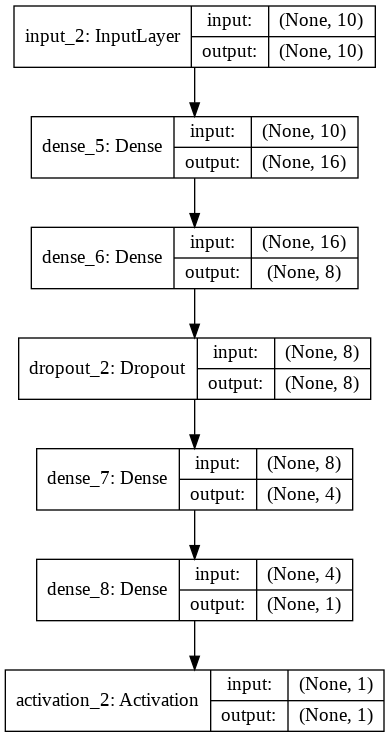

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(x_train, y_train, epochs=1000,batch_size=25 , shuffle=True)

Epoch 1/1000
11877/11877 [==============================] - 1s 87us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 2/1000
11877/11877 [==============================] - 1s 53us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 3/1000
11877/11877 [==============================] - 1s 55us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 4/1000
11877/11877 [==============================] - 1s 53us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 5/1000
11877/11877 [==============================] - 1s 55us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 6/1000
11877/11877 [==============================] - 1s 53us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 7/1000
11877/11877 [==============================] - 1s 54us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 8/1000
11877/11877 [==============================] - 1s 53us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 9/1000
11877/11877 [==============================] - 1s 55us/step - loss: 1.3685 - accuracy: 0.9108
Epoch 10/1000
11877/11877 [==========

## Train models parallely

In [ ]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'xg_boost': {
        'model': XGBClassifier(),
        'params': {
            'booster': ['gbtree', 'gblinear', 'dart'],
            
        }
    }
}

## Processing Test Data

In [ ]:
test_data = pd.read_csv('data/test.csv')

In [ ]:
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,147.47


In [ ]:
test_data.isnull().sum()

tripid                       0
additional_fare              0
duration                     0
meter_waiting                0
meter_waiting_fare           0
meter_waiting_till_pickup    0
pickup_time                  0
drop_time                    0
pick_lat                     0
pick_lon                     0
drop_lat                     0
drop_lon                     0
fare                         0
dtype: int64

In [ ]:
test_data.insert(12, 'distance', np.vectorize(distance)(test_data['pick_lat'], test_data['drop_lat'], test_data['pick_lon'], test_data['drop_lon']))
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare
0,213284604,10.5,924,42,2.4486,148,2/1/2020 0:38,2/1/2020 0:53,6.83454,79.8750,6.77490,79.8840,6.705702,289.27
1,213286352,10.5,4249,20,0.0000,91,2/1/2020 1:02,2/1/2020 2:13,6.91168,79.8723,6.55091,79.9706,41.558513,1912.70
2,213293973,10.5,1552,255,2.6588,23,2/1/2020 5:02,2/1/2020 5:28,6.92145,79.8478,6.90539,79.8989,5.916678,394.00
3,213294622,10.5,462,16,0.0000,198,2/1/2020 5:30,2/1/2020 5:38,6.77433,79.9416,6.80401,79.9407,3.301761,154.32
4,213298687,10.5,814,392,12.3692,69,2/1/2020 7:00,2/1/2020 7:14,6.97968,79.9130,6.98875,79.8914,2.588542,147.47


In [ ]:
test_data.drop('day', axis=1, inplace=True)
test_data.drop('is_weekday', axis=1, inplace=True)

In [ ]:
test_data['pickup_time'] = pd.to_datetime(test_data.pickup_time)
test_data['drop_time'] = pd.to_datetime(test_data.drop_time)
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,213284604,10.5,924,42,2.4486,148,2020-02-01 00:38:00,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,289.27
1,213286352,10.5,4249,20,0.0000,91,2020-02-01 01:02:00,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,1912.70
2,213293973,10.5,1552,255,2.6588,23,2020-02-01 05:02:00,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,394.00
3,213294622,10.5,462,16,0.0000,198,2020-02-01 05:30:00,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,154.32
4,213298687,10.5,814,392,12.3692,69,2020-02-01 07:00:00,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,147.47


In [ ]:
test_cols = ['additional_fare', 'duration', 'meter_waiting', 'meter_waiting_fare', 'meter_waiting_till_pickup', 'day', 'is_weekday', 'distance', 'fare']
test_data_x = test_data.filter(test_cols, axis=1)
test_data_x.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,day,is_weekday,distance,fare
0,10.5,924,42,2.4486,148,5,0,6.705702,289.27
1,10.5,4249,20,0.0000,91,5,0,41.558513,1912.70
2,10.5,1552,255,2.6588,23,5,0,5.916678,394.00
3,10.5,462,16,0.0000,198,5,0,3.301761,154.32
4,10.5,814,392,12.3692,69,5,0,2.588542,147.47


In [ ]:
# Third position would be at index 2, because of zero-indexing.
test_data.insert(7, 'pickup_day', test_data.pickup_time.dt.weekday)
test_data.insert(8, 'pickup_month', test_data.pickup_time.dt.month)
test_data.insert(9, 'pickup_year', test_data.pickup_time.dt.year)
test_data.insert(10, 'pickup_hour', test_data.pickup_time.dt.hour)
test_data.insert(11, 'pickup_minute', test_data.pickup_time.dt.minute)
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare
0,213284604,10.5,924,42,2.4486,148,2020-02-01 00:38:00,5,2,2020,0,38,2020-02-01 00:53:00,6.83454,79.8750,6.77490,79.8840,6.705702,289.27
1,213286352,10.5,4249,20,0.0000,91,2020-02-01 01:02:00,5,2,2020,1,2,2020-02-01 02:13:00,6.91168,79.8723,6.55091,79.9706,41.558513,1912.70
2,213293973,10.5,1552,255,2.6588,23,2020-02-01 05:02:00,5,2,2020,5,2,2020-02-01 05:28:00,6.92145,79.8478,6.90539,79.8989,5.916678,394.00
3,213294622,10.5,462,16,0.0000,198,2020-02-01 05:30:00,5,2,2020,5,30,2020-02-01 05:38:00,6.77433,79.9416,6.80401,79.9407,3.301761,154.32
4,213298687,10.5,814,392,12.3692,69,2020-02-01 07:00:00,5,2,2020,7,0,2020-02-01 07:14:00,6.97968,79.9130,6.98875,79.8914,2.588542,147.47


In [ ]:
test_data.insert(13, 'drop_day', test_data.drop_time.dt.weekday)
test_data.insert(14, 'drop_month', test_data.drop_time.dt.month)
test_data.insert(15, 'drop_year', test_data.drop_time.dt.year)
test_data.insert(16, 'drop_hour', test_data.drop_time.dt.hour)
test_data.insert(17, 'drop_minute', test_data.drop_time.dt.minute)
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare
0,213284604,10.5,924,42,2.4486,148,2020-02-01 00:38:00,5,2,2020,0,38,2020-02-01 00:53:00,5,2,2020,0,53,6.83454,79.8750,6.77490,79.8840,6.705702,289.27
1,213286352,10.5,4249,20,0.0000,91,2020-02-01 01:02:00,5,2,2020,1,2,2020-02-01 02:13:00,5,2,2020,2,13,6.91168,79.8723,6.55091,79.9706,41.558513,1912.70
2,213293973,10.5,1552,255,2.6588,23,2020-02-01 05:02:00,5,2,2020,5,2,2020-02-01 05:28:00,5,2,2020,5,28,6.92145,79.8478,6.90539,79.8989,5.916678,394.00
3,213294622,10.5,462,16,0.0000,198,2020-02-01 05:30:00,5,2,2020,5,30,2020-02-01 05:38:00,5,2,2020,5,38,6.77433,79.9416,6.80401,79.9407,3.301761,154.32
4,213298687,10.5,814,392,12.3692,69,2020-02-01 07:00:00,5,2,2020,7,0,2020-02-01 07:14:00,5,2,2020,7,14,6.97968,79.9130,6.98875,79.8914,2.588542,147.47


In [ ]:
test_data.insert(6, 'is_weekday', test_data.pickup_day.apply(lambda x: 0 if x > 4 else 1))
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,is_weekday,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare
0,213284604,10.5,924,42,2.4486,148,0,2020-02-01 00:38:00,5,2,2020,0,38,2020-02-01 00:53:00,5,2,2020,0,53,6.83454,79.8750,6.77490,79.8840,6.705702,289.27
1,213286352,10.5,4249,20,0.0000,91,0,2020-02-01 01:02:00,5,2,2020,1,2,2020-02-01 02:13:00,5,2,2020,2,13,6.91168,79.8723,6.55091,79.9706,41.558513,1912.70
2,213293973,10.5,1552,255,2.6588,23,0,2020-02-01 05:02:00,5,2,2020,5,2,2020-02-01 05:28:00,5,2,2020,5,28,6.92145,79.8478,6.90539,79.8989,5.916678,394.00
3,213294622,10.5,462,16,0.0000,198,0,2020-02-01 05:30:00,5,2,2020,5,30,2020-02-01 05:38:00,5,2,2020,5,38,6.77433,79.9416,6.80401,79.9407,3.301761,154.32
4,213298687,10.5,814,392,12.3692,69,0,2020-02-01 07:00:00,5,2,2020,7,0,2020-02-01 07:14:00,5,2,2020,7,14,6.97968,79.9130,6.98875,79.8914,2.588542,147.47


In [ ]:
test_data.insert(6, 'distance_duration', (test_data['duration'] - test_data['meter_waiting']- test_data['meter_waiting_till_pickup']))
test_data.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,distance_duration,is_weekday,pickup_time,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,drop_time,drop_day,drop_month,drop_year,drop_hour,drop_minute,pick_lat,pick_lon,drop_lat,drop_lon,distance,fare
0,213284604,10.5,924,42,2.4486,148,734,0,2020-02-01 00:38:00,5,2,2020,0,38,2020-02-01 00:53:00,5,2,2020,0,53,6.83454,79.8750,6.77490,79.8840,6.705702,289.27
1,213286352,10.5,4249,20,0.0000,91,4138,0,2020-02-01 01:02:00,5,2,2020,1,2,2020-02-01 02:13:00,5,2,2020,2,13,6.91168,79.8723,6.55091,79.9706,41.558513,1912.70
2,213293973,10.5,1552,255,2.6588,23,1274,0,2020-02-01 05:02:00,5,2,2020,5,2,2020-02-01 05:28:00,5,2,2020,5,28,6.92145,79.8478,6.90539,79.8989,5.916678,394.00
3,213294622,10.5,462,16,0.0000,198,248,0,2020-02-01 05:30:00,5,2,2020,5,30,2020-02-01 05:38:00,5,2,2020,5,38,6.77433,79.9416,6.80401,79.9407,3.301761,154.32
4,213298687,10.5,814,392,12.3692,69,353,0,2020-02-01 07:00:00,5,2,2020,7,0,2020-02-01 07:14:00,5,2,2020,7,14,6.97968,79.9130,6.98875,79.8914,2.588542,147.47


In [ ]:
test_data.to_csv('data/test_data.csv', index=False)

In [ ]:
test_df = test_data.filter(df_cols, axis=1)
test_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_day,pickup_month,pickup_year,pickup_hour,pickup_minute,pick_lat,pick_lon,drop_lat,drop_lon,fare
0,10.5,924,42,2.4486,148,5,2,2020,0,38,6.83454,79.8750,6.77490,79.8840,289.27
1,10.5,4249,20,0.0000,91,5,2,2020,1,2,6.91168,79.8723,6.55091,79.9706,1912.70
2,10.5,1552,255,2.6588,23,5,2,2020,5,2,6.92145,79.8478,6.90539,79.8989,394.00
3,10.5,462,16,0.0000,198,5,2,2020,5,30,6.77433,79.9416,6.80401,79.9407,154.32
4,10.5,814,392,12.3692,69,5,2,2020,7,0,6.97968,79.9130,6.98875,79.8914,147.47


In [ ]:
test_data_x = sc_x.transform(test_data_x)

In [ ]:
test_data_x = test_df.iloc[:, :].values

## Generate output

In [ ]:
x.shape

(16965, 9)

In [ ]:
# test_data_pred = random_forest_classifier(test_data_x)
test_data_pred = cb_model.predict(test_data_x)

In [ ]:
test_data_pred

array([1, 0, 1, ..., 1, 1, 1])

In [ ]:
def generate_output(test_prediction, classifier_name):
  collist = ['tripid','prediction']

  df=pd.DataFrame(columns=collist)

  df['tripid']=test_data['tripid']
  df['prediction']=test_prediction

  filename = 'output/output_'+classifier_name+'.csv'
  df.to_csv(filename, index=False)
  return df

In [ ]:
output = generate_output(test_data_pred, 'catboost_v5')

In [ ]:
output.head()

,tripid,prediction
0,213284604,1
1,213286352,0
2,213293973,1
3,213294622,1
4,213298687,1


In [ ]:
output['prediction'].value_counts()

1    8210
0     366
Name: prediction, dtype: int64